# Running models and cross validation 

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from termcolor import colored
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn import metrics

In [32]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, accuracy_score
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

In [37]:
# Loading final dataset
#df = pd.read_csv('C:/Users/cpedr/OneDrive - Hertie School/Semester 4/Machine Learning/Project/all_features_merged.csv')
df = pd.read_csv('/Users/isdc/Library/CloudStorage/OneDrive-HertieSchool/2024-1/Machine Learning/ML project/dates_cleaned.csv', index_col=0)
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

print(df.head())
print(df.shape)

#Counting NA
nan_count = df['energy_price'].isna().sum()
print(nan_count)


        Date Country  energy_price     biomass          gas      nuclear  \
0 2015-01-01      CH         44.94  252.200902  1180.283774  7185.089448   
1 2015-01-01      CZ         26.48  135.000000   172.000000  2596.000000   
2 2015-01-01    DK_1         25.02   18.000000   233.000000  7185.089448   
3 2015-01-01    DK_2         27.38   25.000000   304.000000  7185.089448   
4 2015-01-01      EE         27.38  252.200902  1180.283774  7185.089448   

   year  month  day  hour  week_number  day_of_week  
0  2015      1    1     0            1            3  
1  2015      1    1     0            1            3  
2  2015      1    1     0            1            3  
3  2015      1    1     0            1            3  
4  2015      1    1     0            1            3  
(3294780, 12)
0


In [38]:
# Separating features and target variable
y = df['energy_price']
X = df.drop(['energy_price'], axis=1)
y.head()

0    44.94
1    26.48
2    25.02
3    27.38
4    27.38
Name: energy_price, dtype: float64

In [39]:
# Sort by date
df = df.sort_values('Date')

X = df.drop(['energy_price', 'Date', 'Country'], axis=1)
y = df['energy_price']

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=20)

# Apply TimeSeriesSplit to df
for i, (train_index, test_index) in enumerate(tscv.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    print(f"Fold {i}:")
    print(f"  Train Indices: {train_index}")
    print(f"  Test Indices: {test_index}")

test = df.iloc[test_index]


TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 4 positional arguments (and 1 keyword-only argument) were given

In [33]:
# Fit model
model = ARIMA(y_train, order=(1,0,0))
fitted_model = model.fit()

# Forecast
y_pred = fitted_model.forecast(steps=len(X_test))

#print("Accuracy:", accuracy_score(y_test, y_pred))


ValueError: continuous is not supported

MSE: 13059.58691950722


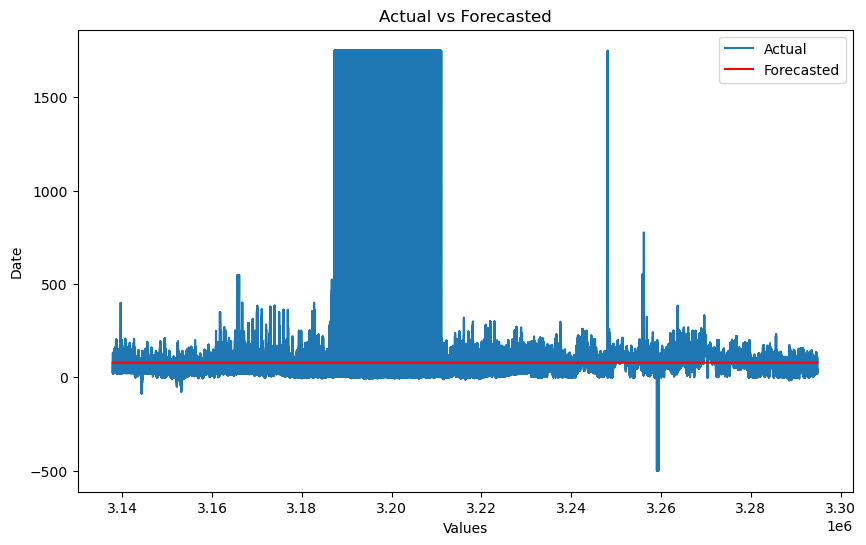

In [36]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

plt.figure(figsize=(10, 6))
plt.plot(test.index, y_test, label='Actual')
plt.plot(test.index, y_pred, label='Forecasted', color='red')
plt.title('Actual vs Forecasted')
plt.ylabel('Date')
plt.xlabel('Values')
plt.legend()
plt.show()



In [ ]:
print(fitted_model)